In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data into a dataframe
customer_df = pd.read_csv('C:/Users/Hamza-Acer/Desktop/customers.csv')

In [3]:
print(customer_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [4]:
#since we have data in string format we must encode it for dimensionality reduction...
print(customer_df.InternetService.unique())
#we only have 3 options here DSL, Fiber Optic and None/No lets encode it....

['DSL' 'Fiber optic' 'No']


In [5]:
#lets check all column types......
print(customer_df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [6]:
#lets use sci-kit labelencoder to encode all objects into int.....
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

#create another dataframe for encoded values...
encoded_customers_df = pd.DataFrame()

customer_df["gender_code"] = lb_make.fit_transform(customer_df["gender"])
#store encoded column in new dataframe...
encoded_customers_df["gender_code"] = customer_df["gender_code"]

customer_df["Partner_code"] = lb_make.fit_transform(customer_df["Partner"])
encoded_customers_df["Partner_code"] = customer_df["Partner_code"]

customer_df["Dependents_code"] = lb_make.fit_transform(customer_df["Dependents"])
encoded_customers_df["Dependents_code"] = customer_df["Dependents_code"]

customer_df["PhoneService_code"] = lb_make.fit_transform(customer_df["PhoneService"])
encoded_customers_df["PhoneService_code"] = customer_df["PhoneService_code"]

customer_df["MultipleLines_code"] = lb_make.fit_transform(customer_df["MultipleLines"])
encoded_customers_df["MultipleLines_code"] = customer_df["MultipleLines_code"]

customer_df["InternetService_code"] = lb_make.fit_transform(customer_df["InternetService"])
encoded_customers_df["InternetService_code"] = customer_df["InternetService_code"]

customer_df["OnlineSecurity_code"] = lb_make.fit_transform(customer_df["OnlineSecurity"])
encoded_customers_df["OnlineSecurity_code"] = customer_df["OnlineSecurity_code"]

customer_df["OnlineBackup_code"] = lb_make.fit_transform(customer_df["OnlineBackup"])
encoded_customers_df["OnlineBackup_code"] = customer_df["OnlineBackup_code"]

customer_df["DeviceProtection_code"] = lb_make.fit_transform(customer_df["DeviceProtection"])
encoded_customers_df["DeviceProtection_code"] = customer_df["DeviceProtection_code"]

customer_df["TechSupport_code"] = lb_make.fit_transform(customer_df["TechSupport"])
encoded_customers_df["TechSupport_code"] = customer_df["TechSupport_code"]

customer_df["StreamingTV_code"] = lb_make.fit_transform(customer_df["StreamingTV"])
encoded_customers_df["StreamingTV_code"] = customer_df["StreamingTV_code"]

customer_df["StreamingMovies_code"] = lb_make.fit_transform(customer_df["StreamingMovies"])
encoded_customers_df["StreamingMovies_code"] = customer_df["StreamingMovies_code"]

customer_df["StreamingTV_code"] = lb_make.fit_transform(customer_df["StreamingTV"])
encoded_customers_df["StreamingTV_code"] = customer_df["StreamingTV_code"]

customer_df["Contract_code"] = lb_make.fit_transform(customer_df["Contract"])
encoded_customers_df["Contract_code"] = customer_df["Contract_code"]

customer_df["PaperlessBilling_code"] = lb_make.fit_transform(customer_df["PaperlessBilling"])
encoded_customers_df["PaperlessBilling_code"] = customer_df["PaperlessBilling_code"]

customer_df["PaymentMethod_code"] = lb_make.fit_transform(customer_df["PaymentMethod"])
encoded_customers_df["PaymentMethod_code"] = customer_df["PaymentMethod_code"]


In [7]:
#lets add remaining numerical rows into encoded dataframe...
encoded_customers_df["SeniorCitizen"] = customer_df["SeniorCitizen"]
encoded_customers_df["tenure"] = customer_df["tenure"]
encoded_customers_df["MonthlyCharges"] = customer_df["MonthlyCharges"]
encoded_customers_df["TotalCharges"] = customer_df["TotalCharges"]

In [8]:
print(encoded_customers_df)

      gender_code  Partner_code  Dependents_code  PhoneService_code  \
0               0             1                0                  0   
1               1             0                0                  1   
2               1             0                0                  1   
3               1             0                0                  0   
4               0             0                0                  1   
...           ...           ...              ...                ...   
7027            1             1                1                  1   
7028            0             1                1                  1   
7029            0             1                1                  0   
7030            1             1                0                  1   
7031            1             0                0                  1   

      MultipleLines_code  InternetService_code  OnlineSecurity_code  \
0                      1                     0                    0   
1    

In [9]:
#import the UMAP library
import umap.umap_ as umap
#make a dimensionality reduction
reducer = umap.UMAP()

In [10]:
#we use the reducer function to reduce the dimensions into 2
encoded_customers_df = encoded_customers_df.to_numpy()
reduced_data = reducer.fit_transform(encoded_customers_df)

In [11]:
print(reduced_data)

[[ 20.556505    12.651775  ]
 [ 11.728857   -13.21823   ]
 [  9.907358    14.26811   ]
 ...
 [ 14.788013     7.9082413 ]
 [ 11.964835     8.797923  ]
 [  0.65218824   9.734543  ]]


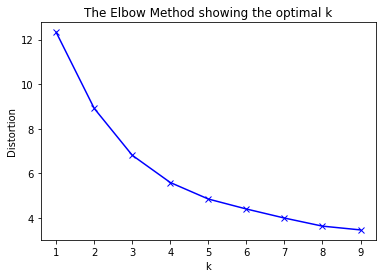

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(reduced_data)
    kmeanModel.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
#the elbow curve is shows very slight curve for 3,4,5 lets use 4 as optimal number
from sklearn.cluster import KMeans
# K-Means clustering for our dataset....
#we decide for 25 clusters since our data is labeled into 25 classes...
model = KMeans(n_clusters=4)
# fit the model
model.fit(reduced_data)
# predict labels with Kmeans clusters and store into yhat
yhat = model.predict(reduced_data)
# retrieve unique clusters
# make the plot in plotly scatter....
KMeansplot = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
KMeansplot.show()
KMeansplot.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/KMeansplot_customers_umap.html")

In [ ]:
#this is too intensive hence we avoid it..
#lets try spectral clustring...
#from sklearn.cluster import SpectralClustering
#model = SpectralClustering(n_clusters=4)
# fit model and predict clusters
#yhat = model.fit_predict(reduced_data)
# retrieve unique clusters
# make the plot in plotly scatter....
#spectral_clustering = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
#spectral_clustering.show()
#spectral_clustering.write_html("C:/Users/Hamza-Acer/Desktop/mnist_umap/spectral_clustering_umap_mnist.html")

In [15]:
#lets try affinity propagation...
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(reduced_data)
# assign a cluster to each example
yhat = model.predict(reduced_data)
# make the plot in plotly scatter....
affinity = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
affinity.show()
affinity.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/affinity_customers_umap.html")

In [18]:
#lets try agglomorative...
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# make the plot in plotly scatter....
Agglomorative_clustering = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
Agglomorative_clustering.show()
Agglomorative_clustering.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/agglomorative_customers_umap.html")

In [19]:
#lets try dbscan..
from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# make the plot in plotly scatter....
dbscan = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
dbscan.show()
dbscan.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/dbscan_customers_umap.html")

In [23]:
#lets try meanshift..
from sklearn.cluster import MeanShift
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# make the plot in plotly scatter....
meanshift = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
meanshift.show()
meanshift.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/meanshift_customers_umap.html")

In [24]:
#lets try optics..
from sklearn.cluster import OPTICS
# define the model
model = OPTICS(eps=0.8, min_samples=100)
# fit model and predict clusters
yhat = model.fit_predict(reduced_data)
# make the plot in plotly scatter....
optics = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
optics.show()
optics.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/optics_customers_umap.html")

In [25]:
#lets try gaussian
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=4)
# fit the model
model.fit(reduced_data)
# assign a cluster to each example
yhat = model.predict(reduced_data)
# make the plot in plotly scatter....
gaussian = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color = yhat.astype(str))
gaussian.show()
gaussian.write_html("C:/Users/Hamza-Acer/Desktop/customers_umap/gaussian_customers_umap.html")